<a href="https://colab.research.google.com/github/ZabalaGaston/HPC/blob/main/Zabala_Gaston_ejercicio_2_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introducción

El siguiente ejemplo muestra la transformación RGB a HSV de una imagen parametrizada. 

Sea MAX el valor máximo de los componentes (R, G, B), y MIN el valor mínimo de esos mismos valores, los componentes del espacio HSV se pueden calcular como:

H =\begin{cases}
\mbox{no definido}, & \mbox{si } MAX = MIN \\
60^\circ \times \frac{G - B}{MAX - MIN} + 0^\circ, & \mbox{si } MAX = R \\ &\mbox{y } G \ge B \\
60^\circ \times \frac{G - B}{MAX - MIN} + 360^\circ, & \mbox{si } MAX = R \\ &\mbox{y } G < B \\
60^\circ \times \frac{B - R}{MAX - MIN} + 120^\circ, & \mbox{si } MAX = G \\
60^\circ \times \frac{R - G}{MAX - MIN} + 240^\circ, & \mbox{si } MAX = B
\end{cases}

S =
\begin{cases}0,&{\mbox{si }}MAX=0\\1-{\frac {MIN}{MAX}},&{\mbox{en otro caso}}\end{cases}

V = MAX \


#2 Armado del ambiente
Toma la dirección web de una imagen con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno Colab.

In [2]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://www.dzoom.org.es/wp-content/uploads/2017/07/seebensee-2384369-1024x681.jpg" #@param {type:"string"}
!wget {url_imagen} -O imagen.jpg


--2020-11-17 15:40:17--  https://www.dzoom.org.es/wp-content/uploads/2017/07/seebensee-2384369-1024x681.jpg
Resolving www.dzoom.org.es (www.dzoom.org.es)... 104.26.10.161, 172.67.73.36, 104.26.11.161, ...
Connecting to www.dzoom.org.es (www.dzoom.org.es)|104.26.10.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239427 (234K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>] 233.82K  1.42MB/s    in 0.2s    

2020-11-17 15:40:17 (1.42 MB/s) - ‘imagen.jpg’ saved [239427/239427]



# 3 Desarrollo

Tiempo de conversión de imagen: 9312.572 [ms]
Tiempo Total: 9389.806 [ms]
[  1  97 183]
[211  99  71]


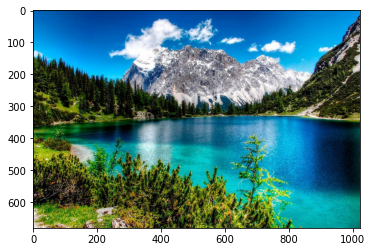

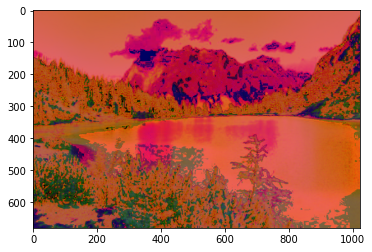

In [8]:
 %matplotlib inline
from datetime import datetime

tiempo_total = datetime.now()

import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

# Definición de función que convierte de RGB a HSV
def rgb_a_hsv (r,g,b):
    r = r / 255.0
    g = g / 255.0
    b = b / 255.0

    minimo = min(r, g, b)
    maximo = max(r, g, b)

    diferencia = maximo - minimo

    if minimo == maximo:
      h = 0
    elif maximo == r:
      h = (60 * ((g - b)/diferencia) + 360) % 360
    elif maximo == g:
      h = (60 * ((g - b)/diferencia) + 120 ) % 360
    elif maximo == b:
      h = (60 * ((g - b)/diferencia) + 240) % 360

    if maximo == 0:
      s = 0
    else:
      s = (diferencia / maximo) * 100

    v = maximo * 100
    return h, s, v

# --------------------------------------------
try: 
  img_nombre = 'imagen.jpg'
  image = Image.open( img_nombre ) 
    
  # Obtengo las proporsiones de la imagen. 
  img_alto, img_ancho = image.size 

  # Convierto la imagen comprimida en JPEG/PNG a array.
  img_pic_cpu = numpy.asarray(image)

  # Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
  img_picR_cpu = numpy.empty_like( img_pic_cpu)

  plt.figure()
  imgplot=plt.imshow( img_pic_cpu )

  tiempo_img = datetime.now()

  # Convierto la imagen a HSV
  for y  in range( 0, img_alto ):
    for x in range( 0, img_ancho ):
      pixel_R, pixel_G, pixel_B = img_pic_cpu[x][y]
      img_picR_cpu[x][y] = rgb_a_hsv(pixel_R, pixel_G, pixel_B)

  tiempo_img = datetime.now() - tiempo_img

  # Muestro la imagen luego de convertirla.
  plt.figure()
  imgplot = plt.imshow( img_picR_cpu )

  tiempo_total = datetime.now() - tiempo_total

  print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
  print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )
  print(img_pic_cpu[1][1])
  print(img_picR_cpu[1][1])

except Exception as e:
  print("Error:",e.args)

# 4 Tabla de pasos de ejecución del programa


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  @param                | Lectura de la dirección URL de la imagen (jpg) a procesar.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  Image.open()          | Abre el archivo de la imagen.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  numpy.empty_like(()   | Genera el array destino, que tendrá a la imagen resultado. 
CPU      |  plt.imshow            | Muestra la imagen original.
CPU      |  for...for..           | Iteración para convertir imagen.
CPU      |  rgb_a_hsv(b,a, c)     | Convierte la imagen a HSV.
CPU      |  plt.imshow            | Muestra la imagen resultado.
CPU      |  tiempo_en_ms( time ) | Transforma tiempos en milisegundos
CPU      |  print()               | Muestra estadísticas


---
# 5 Conclusiones

Las conclusiones son explicadas en clase...

---
# 6 Bibliografía

[1] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[2] Modelo color HSV: [Enlace](https://es.wikipedia.org/wiki/Modelo_de_color_HSV)